In [1]:
import pandas as pd
import numpy as np 
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score,precision_score,accuracy_score,confusion_matrix
from sklearn.decomposition import PCA
import scipy
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import cm
from sklearn.preprocessing import StandardScaler
import seaborn as sns; sns.set()
from bioinfokit.visuz import cluster
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
%run -i 'visual_model_selection.py'

# Visual confusion matrices

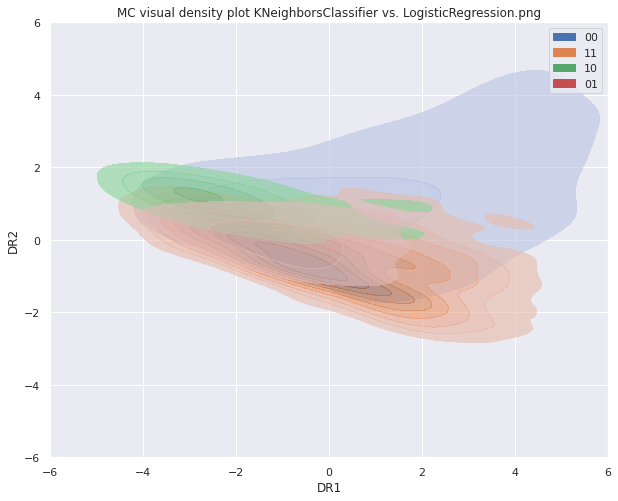

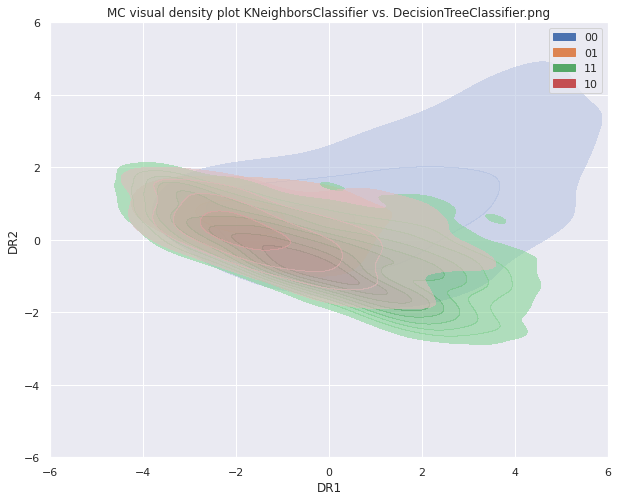

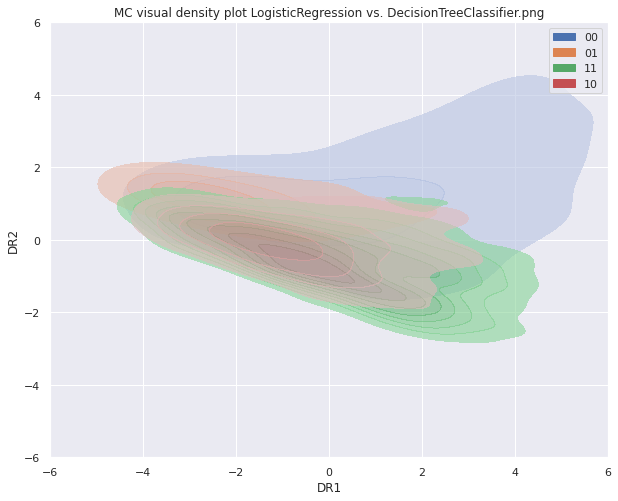

In [3]:
#figure 5 Density VCM plots

df = pd.read_csv('Magic.csv')
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

features=X.columns.values
clf1=KNeighborsClassifier().fit(X_train, y_train)
clf2=LogisticRegression(max_iter=1000).fit(X_train, y_train)
clf3=DecisionTreeClassifier().fit(X_train, y_train)
Y1='KNeighborsClassifier', clf1.predict(X_test)
Y2='LogisticRegression', clf2.predict(X_test)
Y3='DecisionTreeClassifier', clf3.predict(X_test)

Y_list=[Y1,Y2,Y3]

X_st =  StandardScaler().fit_transform(X_test)
pca_scores = PCA(n_components=2).fit_transform(X_st)
X_DR=pd.DataFrame(pca_scores, columns=['DR1','DR2'])

MC_visual_density_plot(X_DR, Y_list, export_file=False)

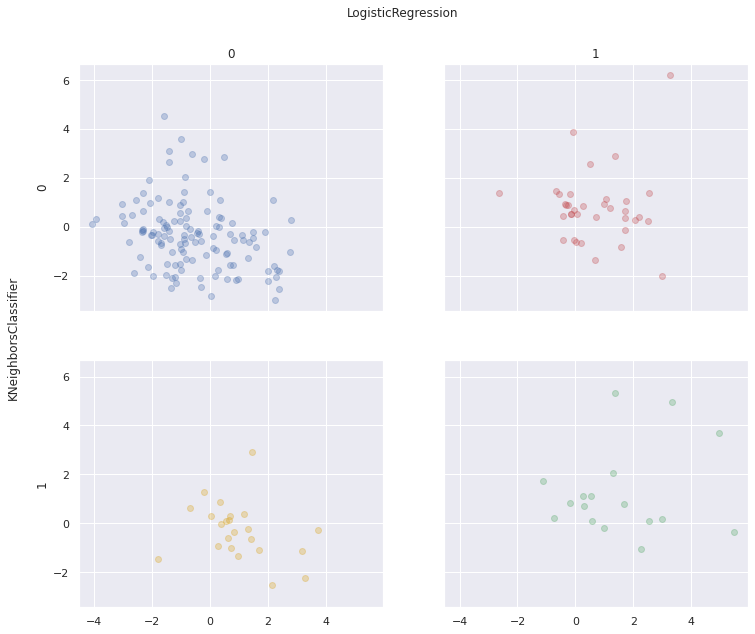

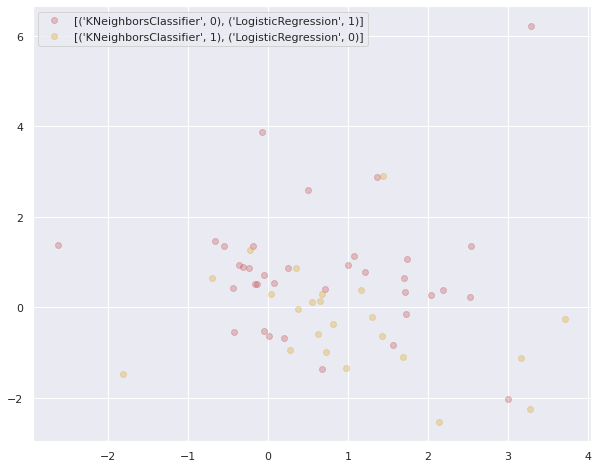

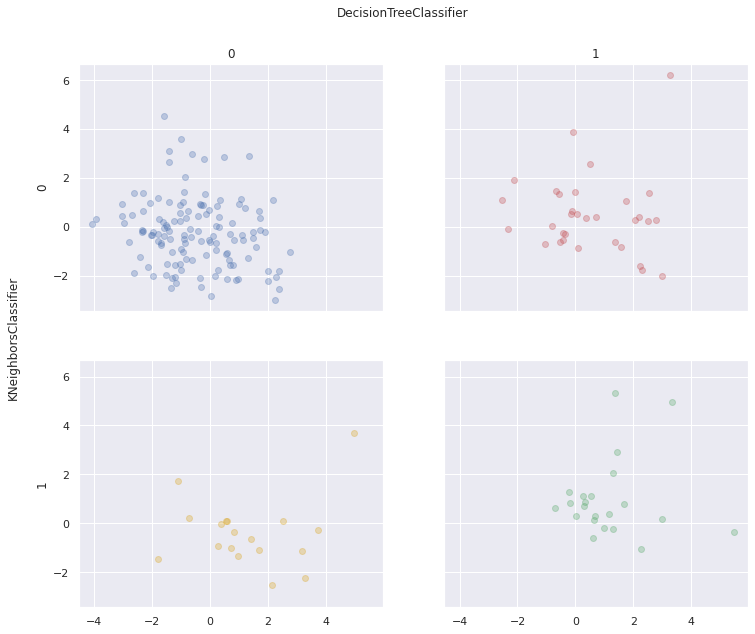

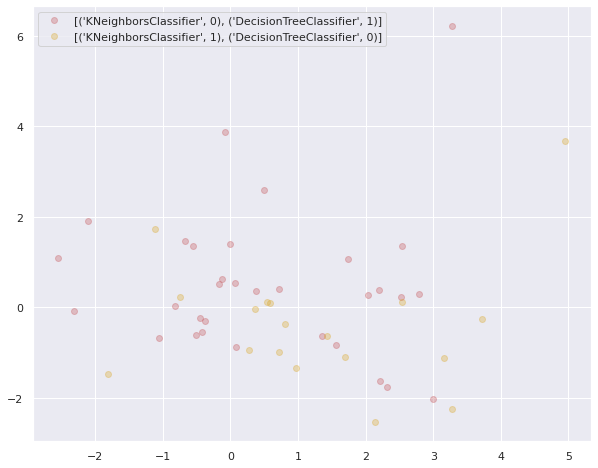

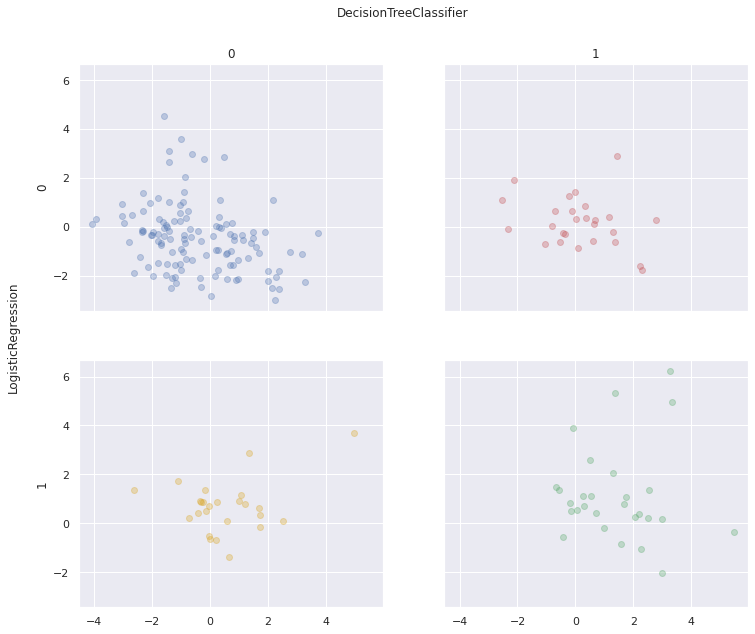

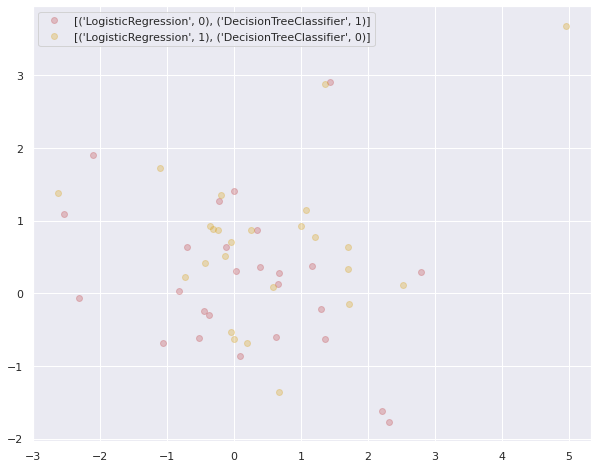

In [4]:
#figure 6 Scatter plots of VCMs

df = pd.read_csv('GermanCredit.csv')
X = df.values[:, :-1]
Y = df.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

clf1=KNeighborsClassifier().fit(X_train, y_train)
clf2=LogisticRegression(max_iter=1000).fit(X_train, y_train)
clf3=DecisionTreeClassifier().fit(X_train, y_train)
Y1='KNeighborsClassifier', clf1.predict(X_test)
Y2='LogisticRegression', clf2.predict(X_test)
Y3='DecisionTreeClassifier', clf3.predict(X_test)

Y_list=[Y1,Y2,Y3]

X_st =  StandardScaler().fit_transform(X_test)
pca_scores = PCA(n_components=2).fit_transform(X_st)
X_DR=pd.DataFrame(pca_scores, columns=['DR1','DR2'])

MC_visual_confusion_matrix(X_DR, Y_list, export_file=False)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


MC_biplot KNeighborsClassifier vs. LogisticRegression


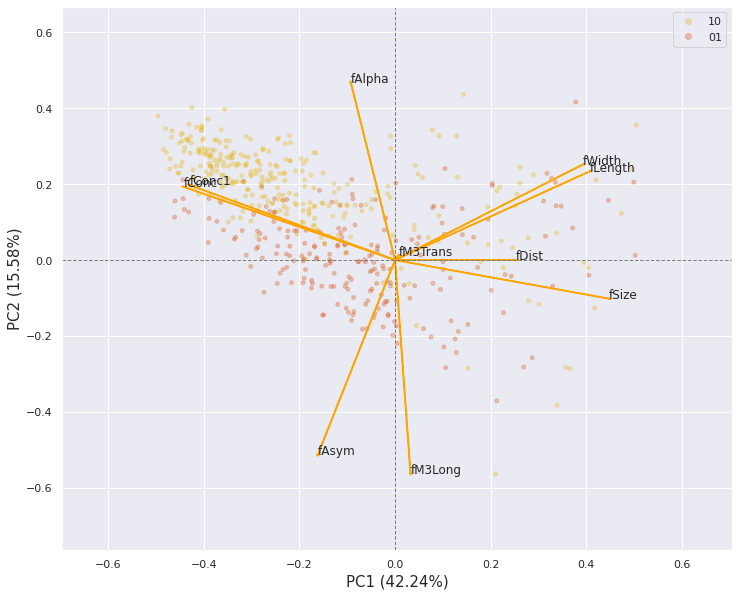

MC_biplot KNeighborsClassifier vs. DecisionTreeClassifier


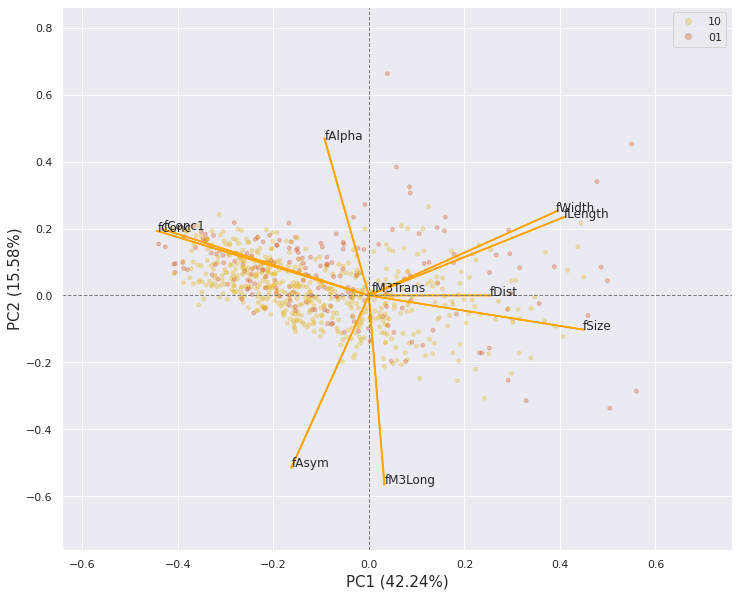

MC_biplot LogisticRegression vs. DecisionTreeClassifier


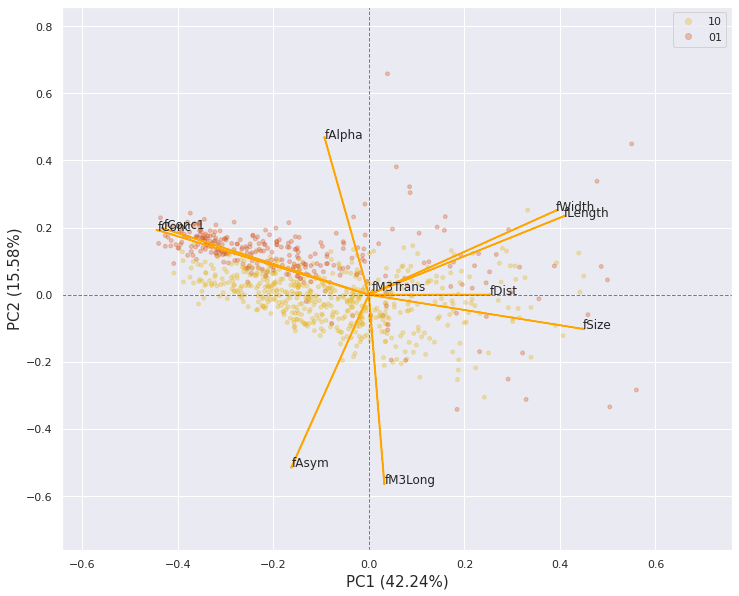

In [5]:
#figure 7 Biplots of VCMs

df = pd.read_csv('Magic.csv')
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

features=X.columns.values
clf1=KNeighborsClassifier().fit(X_train, y_train)
clf2=LogisticRegression(max_iter=1000).fit(X_train, y_train)
clf3=DecisionTreeClassifier().fit(X_train, y_train)
Y1='KNeighborsClassifier', clf1.predict(X_test)
Y2='LogisticRegression', clf2.predict(X_test)
Y3='DecisionTreeClassifier', clf3.predict(X_test)

Y_list=[Y1,Y2,Y3]

X_st =  StandardScaler().fit_transform(X_test)
pca_model = PCA(n_components=2).fit(X_st) #PCA().fit(X_st)
X_pca = PCA(n_components=2).fit_transform(X_st)

MC_biplot(X_pca, pca_model, Y_list, export_file=False)

# Visual comparative matrices

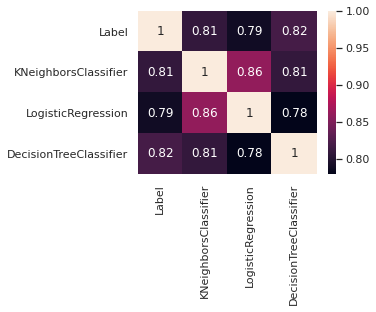

In [6]:
#figure 3 VCX Heatmaps of pairwise agreement

df = pd.read_csv('Magic.csv')
X = df.values[:, :-1]
Y = df.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

clf1=KNeighborsClassifier().fit(X_train, y_train)
clf2=LogisticRegression(max_iter=1000).fit(X_train, y_train)
clf3=DecisionTreeClassifier().fit(X_train, y_train)

Label='Label', y_test.astype(int)
Y1='KNeighborsClassifier', clf1.predict(X_test).astype(int)
Y2='LogisticRegression', clf2.predict(X_test).astype(int)
Y3='DecisionTreeClassifier', clf3.predict(X_test).astype(int)

Y_list=[Label,Y1,Y2,Y3]

MC_heatmap_of_prediction(Y_list, export_file=False)

# Visual model landscape

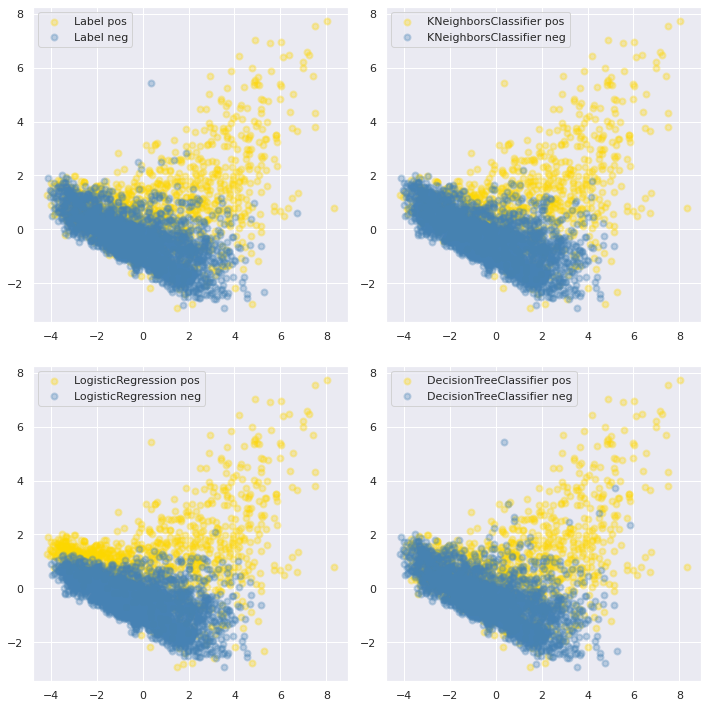

In [7]:
#figure 10 Simple comparison of model predictions using DR

df = pd.read_csv('Magic.csv')
X = df.values[:, :-1]
Y = df.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

clf1=KNeighborsClassifier().fit(X_train, y_train)
clf2=LogisticRegression(max_iter=1000).fit(X_train, y_train)
clf3=DecisionTreeClassifier().fit(X_train, y_train)

Label='Label', y_test.astype(int)
Y1='KNeighborsClassifier', clf1.predict(X_test).astype(int)
Y2='LogisticRegression', clf2.predict(X_test).astype(int)
Y3='DecisionTreeClassifier', clf3.predict(X_test)
Y_list=[Label, Y1, Y2, Y3]

X_st =  StandardScaler().fit_transform(X_test)
pca_scores = PCA(n_components=2).fit_transform(X_st)
X_DR=pd.DataFrame(pca_scores, columns=['DR1','DR2'])

MC_simple_dr_comparison(X_DR, Y_list, export_file=False)

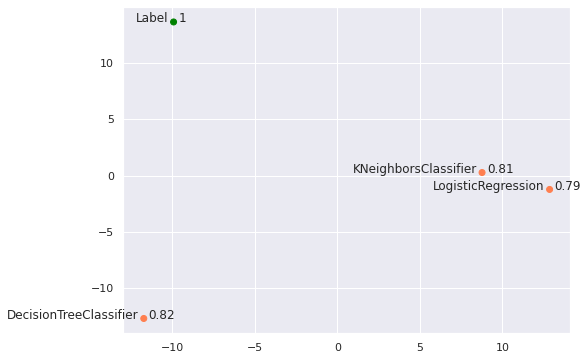

In [8]:
#figure 11 Comparing models of different hypothesis classes

df = pd.read_csv('Magic.csv')
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

clf1=KNeighborsClassifier().fit(X_train, y_train)
clf2=LogisticRegression(max_iter=1000).fit(X_train, y_train)
clf3=DecisionTreeClassifier().fit(X_train, y_train)

Label='Label', y_test.astype(int).reset_index(drop=True), 1
Y1='KNeighborsClassifier', clf1.predict(X_test).astype(int),accuracy_score(y_test, pd.DataFrame(clf1.predict(X_test))).round(2)
Y2='LogisticRegression', clf2.predict(X_test).astype(int),accuracy_score(y_test, pd.DataFrame(clf2.predict(X_test))).round(2)
Y3='DecisionTreeClassifier', clf3.predict(X_test).astype(int),accuracy_score(y_test, pd.DataFrame(clf3.predict(X_test))).round(2)

Y_list=[Label,Y1,Y2,Y3]
MC_scatterplot_prediction(Y_list, export_file=False)

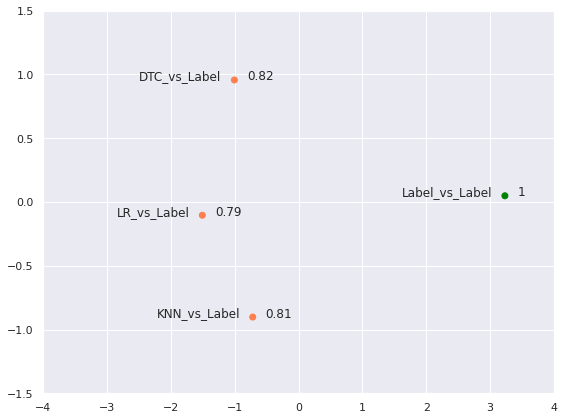

In [9]:
#figure 13 Accelerating computation using confusion matrices

df = pd.read_csv('Magic.csv')
X = df.values[:, :-1]
Y = df.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

clf1=KNeighborsClassifier().fit(X_train, y_train)
clf2=LogisticRegression(max_iter=1000).fit(X_train, y_train)
clf3=DecisionTreeClassifier().fit(X_train, y_train)

Label='Label', y_test.astype(int), 1
Y1='KNN', clf1.predict(X_test).astype(int),accuracy_score(y_test, pd.DataFrame(clf1.predict(X_test))).round(2)
Y2='LR', clf2.predict(X_test).astype(int),accuracy_score(y_test, pd.DataFrame(clf2.predict(X_test))).round(2)
Y3='DTC', clf3.predict(X_test).astype(int),accuracy_score(y_test, pd.DataFrame(clf3.predict(X_test))).round(2)
Y_list=[Label,Y1,Y2,Y3]

MC_scatterplot_confusion(Y_list, export_file=False)

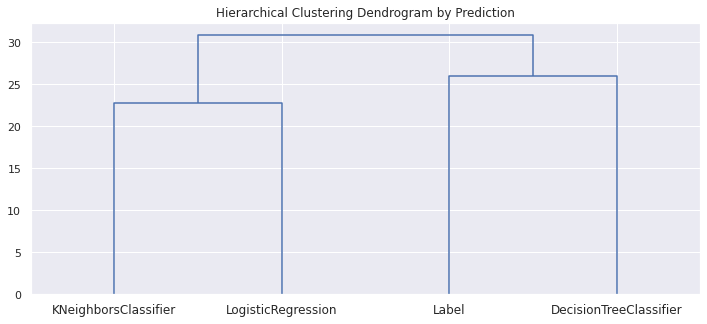

In [10]:
#figure 14 VML dendrograms

df = pd.read_csv('Magic.csv')
X = df.values[:, :-1]
Y = df.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

clf1=KNeighborsClassifier().fit(X_train, y_train)
clf2=LogisticRegression(max_iter=1000).fit(X_train, y_train)
clf3=DecisionTreeClassifier().fit(X_train, y_train)

Label='Label', y_test.astype(int)
Y1='KNeighborsClassifier', clf1.predict(X_test).astype(int)
Y2='LogisticRegression', clf2.predict(X_test).astype(int)
Y3='DecisionTreeClassifier', clf3.predict(X_test).astype(int)
Y_list=[Label,Y1,Y2,Y3]

MC_hierarchical_tree(Y_list, export_file=False)